# World Health Organization(WHO) Suicide Statistics

 **Author: Muhammad Akmal**\
 **Date: 22/10/2022**\
 **Email: akmal199511@gmail.com**\
 **Kaggle_Profile** [link](https://www.kaggle.com/akmal1995/code)\
 **Student ID: 23087309**

This dataset is taken from Kaggle.\
The link to access the dataset is:
https://www.kaggle.com/datasets/szamil/who-suicide-statistics

### **Importing necessary libraries**

In [777]:
# importing necessary libraries

# general purpose libraries
import pandas as pd
import numpy as np
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [778]:
# to hide any runtime warnings
import warnings
warnings.filterwarnings('ignore')

### **Laoding the downloaded csv file**

In [779]:
# loading the downloaded csv file
df = pd.read_csv('who_suicide_statistics.csv')

### **Getting over view of the dataset**

In [780]:
# first five rows
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.00
1,Albania,1985,female,25-34 years,NaN,246800.00
2,Albania,1985,female,35-54 years,NaN,267500.00
3,Albania,1985,female,5-14 years,NaN,298300.00
4,Albania,1985,female,55-74 years,NaN,138700.00


In [781]:
# checking the column names
for column in df.columns:
    print(f"The name of the column is: '{column}' ")

The name of the column is: 'country' 
The name of the column is: 'year' 
The name of the column is: 'sex' 
The name of the column is: 'age' 
The name of the column is: 'suicides_no' 
The name of the column is: 'population' 


In [782]:
# checking the data type of each column
print("The data type of each column is: ")
df.dtypes

The data type of each column is: 


country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [783]:
# check for the number of rows and columns

# The number of rows in dataset is 
print(f"The number of rows in our dataset is='{df.shape[0]}' \n")
# The number of column in our dataset is
print(f"The number of columns in our dataset is='{ df.shape[1]}'")

The number of rows in our dataset is='43776' 

The number of columns in our dataset is='6'


---

- Our dataset has 6 coulmns in which three of them are catagorical and three are numeric.

- Columns like `country` , 'sex' , 'age' have object data type whereas `year` has int data type. In contrast to that both `suicides_no` and `population` have float data type.

- The number of rows in our dataset is 43776
---

In [784]:
# check for the value counts in country column
print("The number of unique values in country column is: " ,
      df['country'].nunique())

The number of unique values in country column is:  141


---

We have a record of total 141 countries across the globe.

---

In [785]:
# check for the unique values in each column
print(f''' The unique values in yaer column is \n
{df['year'].unique()}
      ''')

 The unique values in yaer column is 

[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 1983 1984 2016 1979 1980 1981 1982]
      


In [786]:
# getting count of unqiue values in year column
print('The number of years in our dataset is:', df.year.nunique())

The number of years in our dataset is: 38


---

We have data which spans over 38 years from 1979 to 2016


---

In [787]:
# check for the unique values count in sex column
print('The unique value counts in sex column is: ')
df.sex.value_counts()

The unique value counts in sex column is: 


sex
female    21888
male      21888
Name: count, dtype: int64

---

Out of total `43776` records in our dataset have of them are male and half of them are females

---


In [788]:
# check for how many unique age groups we have
print(f'''
The unique value counts in age column is: \n
{df['age'].unique()}
''')


The unique value counts in age column is: 

['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']



---

As we can see we have six age groups

|No. | Age Group |
| --- | --- |
| 1 | 5-14 years |
| 2 | 15-24 years |
| 3 | 25-34 years |
| 4 | 35-54 years |
| 5 | 55-74 years |
| 6 | 75+ years |
---

In [789]:
# checking the count of unique values of each age group
print('The values count of each age group is:')
df.age.value_counts()

The values count of each age group is:


age
15-24 years    7296
25-34 years    7296
35-54 years    7296
5-14 years     7296
55-74 years    7296
75+ years      7296
Name: count, dtype: int64

---

All the age groups in our dataset have equal number of records each age group contains 7296 records

----



#### **Null Values Exploration:**

In [790]:
# check for the sum of null values in the dataset
print('Not a number(Nan) values count in each column is: ')
df.isnull().sum()

Not a number(Nan) values count in each column is: 


country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [791]:
# percentage of null values in our dataset
print(f'''
The missing values percentage in each column: \n
{df.isna().sum() / len(df)*100}
''')


The missing values percentage in each column: 

country        0.00
year           0.00
sex            0.00
age            0.00
suicides_no    5.15
population    12.47
dtype: float64



---

As we can see `suicides_no` and `population` columns have null values in our dataset. `suicides_no` have nan values `2256` which `5.14 %` of whole dataset and `population` have nan values `5460` which is 12.47%.

---

In [792]:
# unique vales in suicides_no column
df.suicides_no.unique()

array([       nan, 1.4000e+01, 4.0000e+00, ..., 1.1634e+04, 9.0680e+03,
       3.1710e+03])

In [793]:
# filtering the first 3 rows with nan values in population column
df[df['population'].isna()].head(3)

,country,year,sex,age,suicides_no,population
372,Anguilla,1983,female,15-24 years,0.00,NaN
373,Anguilla,1983,female,25-34 years,0.00,NaN
374,Anguilla,1983,female,35-54 years,0.00,NaN



### **Imputing missing values:**

#### **population column**

In [794]:
def missing_values_imputation_population():
    '''
    The function to impute missing values in population column
    '''
    # checking the condition using if statemnet
    if df['population'].isnull().sum()>0:
        # calculating the mdian of population
        population_median=df['population'].median()
        # filling the missing values in population column with medina of it
        df['population'].fillna(population_median, inplace=True)
        
        return

In [795]:
# calling the function  
missing_values_imputation_population()

# confirming the outcome
print(f'''
The missing values in population column is: {df['population'].isna().sum()}
''')


The missing values in population column is: 0



#### **suicides_no col:**

In [796]:
def missing_values_imputation_suicides_no():
    '''
    The function to impute the missing values in suicides_no column
    '''
    # checking the condition using if statemnet
    if df['suicides_no'].isnull().sum()>0:
        # calculating the mdian of suicides_no
        suicides_median=df['suicides_no'].median()
        # filling the missing values in suicides_no column with medina of it
        df['suicides_no'].fillna(suicides_median, inplace=True)
        
        return

In [797]:
# calling the function  
missing_values_imputation_suicides_no()

# confirming the outcome
print(f'''
The missing values in suicides_no column is: {df['suicides_no'].isna().sum()}
''')


The missing values in suicides_no column is: 0



### **Duplicates**

In [798]:
# for loop to check for any duplicate values in dataframe
for column in df.columns:
    print(f"The duplicate values in '{column}' is: '{df.duplicated().any()}'")

The duplicate values in 'country' is: 'False'
The duplicate values in 'year' is: 'False'


The duplicate values in 'sex' is: 'False'
The duplicate values in 'age' is: 'False'
The duplicate values in 'suicides_no' is: 'False'
The duplicate values in 'population' is: 'False'


### **Descriptive Statistics**

In [799]:
# to show values in float format rather than scientific notation
pd.options.display.float_format = '{:.2f}'.format


In [800]:
# applying descriptive statistics
df.describe()

,year,suicides_no,population
count,43776.00,43776.00,43776.00
mean,1998.50,184.07,1504013.44
std,10.34,780.69,3438451.10
min,1979.00,0.00,259.00
25%,1990.00,1.00,118498.25
50%,1999.00,14.00,380655.00
75%,2007.00,83.00,1067009.25
max,2016.00,22338.00,43805214.00


In [801]:
# the value count of different age groups gender wise
df.groupby('sex')['age'].value_counts()

sex     age        
female  15-24 years    3648
        25-34 years    3648
        35-54 years    3648
        5-14 years     3648
        55-74 years    3648
        75+ years      3648
male    15-24 years    3648
        25-34 years    3648
        35-54 years    3648
        5-14 years     3648
        55-74 years    3648
        75+ years      3648
Name: count, dtype: int64

In [802]:
# The country with lowest population
df[df['population']==df['population'].min()]

,country,year,sex,age,suicides_no,population
32351,Rodrigues,2004,male,75+ years,0.00,259.00


In [803]:
# The country with highest population
df[df['population']==df['population'].max()]

,country,year,sex,age,suicides_no,population
42242,United States of America,2006,female,35-54 years,3376.00,43805214.00


In [804]:
# The country with max suicide rate
df[df['suicides_no']==df['suicides_no'].max()]

,country,year,sex,age,suicides_no,population
33128,Russian Federation,1994,male,35-54 years,22338.00,19044200.00


In [805]:
# median value of population 
print(f"The mean value of population is: {df['population'].median()}")

The mean value of population is: 380655.0


In [806]:
# median of the suicides_no
print(f'The median of the suicides no is: {df["suicides_no"].median()}')

The median of the suicides no is: 14.0


---

- The mean value of suicides is 184 and maximum suicides are 22338. Also, the minimum values of suicides is zero in some years.

- The median of the population is 380655.0 and the median of the suicides_no is 14.0
  
- The country with minimum population in our dataset is `Rodrigues` which also have zero suicides among 75+ plus years age group in the year 2004 and all of them are males.

-  And the country with maximum population is `United States of America`.
  
- ` Russian Federation ` has highest suicide rate in 1994 among 35-54 years age group.

---


In [807]:
# count of suicide in different age groups
age_group_wise_suicides = df.groupby('age')['suicides_no'].sum()
# aranging the results in ascending order
age_group_wise_suicides.sort_values(ascending=True)


age
5-14 years      68576.00
75+ years      762931.00
15-24 years    989551.00
25-34 years   1372597.00
55-74 years   1963732.00
35-54 years   2900652.00
Name: suicides_no, dtype: float64

### **Pie_Chart:** 
####  **Age Group Wise Suicide Percentage**

In [808]:
# defining the funtion for plotting pie chart
def plot_pie_chart(age_group_wise_suicides):
    '''
    The pie chart of age group wise suicides percentage
    '''
    # defining the figure size ad dpi
    plt.figure(figsize=(10, 5), dpi=144)
    # defining labels as unique enteries of age column
    label=df.age.unique()
    # count of suicide in different age groups
    age_group_wise_suicides=df.groupby('age')['suicides_no'].sum()

    # plotting the pie chart
    plt.pie(age_group_wise_suicides, 
            labels=label,  
            autopct='%1.1f%%', # showing the percentage with 1 decimal place
            explode=[0.01]*len(label)# exploding the pie chart
        )
    
    # defining title and font size for title 
    plt.title('Suicide Percentage of Different Age Groups' , fontsize = 12)
    
    plt.show()

    return

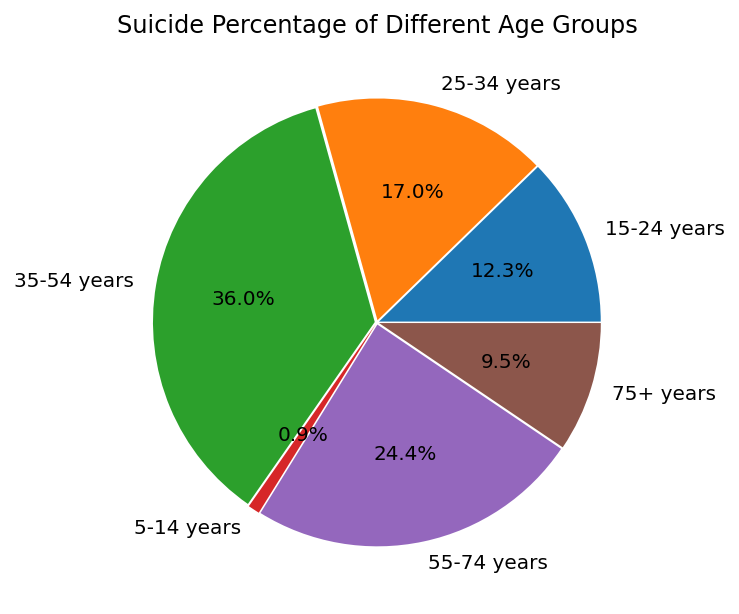

In [809]:
# calling the function to plot pie chart
plot_pie_chart(age_group_wise_suicides)

---

- As all the age groups have equall number of representation in our records but as we can see the age group `5-14 years` has lowest number of suicides

- Also the suicidal rate in 75+ years old is under 10%


- Whereas `35-54 years` has highest number of suicides.

---

In [810]:
# suicides number in both genders according to their age groups
df.groupby(['sex', 'age'])['suicides_no'].sum()

sex     age        
female  15-24 years    224369.00
        25-34 years    260654.00
        35-54 years    611643.00
        5-14 years      23276.00
        55-74 years    531655.00
        75+ years      266467.00
male    15-24 years    765182.00
        25-34 years   1111943.00
        35-54 years   2289009.00
        5-14 years      45300.00
        55-74 years   1432077.00
        75+ years      496464.00
Name: suicides_no, dtype: float64

#### **Male Suicide Rate**

In [811]:
# male suicide count
male_suicide=df[df['sex']=='male']['suicides_no'].sum()

# male suicide rate
percent_male_suicide=(male_suicide / df['suicides_no'].sum())*100

# printing out the results
print(f'percent_male_suicide={round(percent_male_suicide,2)}')

percent_male_suicide=76.2


#### **Female Suicide Rate**

In [812]:
# male suicide count

female_suicide = df[df['sex']=='female']['suicides_no'].sum()

# male suicide rate
percent_female_suicide=(female_suicide / df['suicides_no'].sum())*100

# printing out the results
print(f'percent_female_suicide={round(percent_female_suicide,2)}')

percent_female_suicide=23.8


### **Bar_Chart:** 
####  **Percentage of Male and Female Suicide**

In [844]:
def percent_suicide():
    '''
    suicides percentage in both genders
    '''
    # defining the dpi
    plt.figure(figsize=(10, 5), dpi=144) 
    # defining color for each bar 
    bar_colors=['pink', 'navy']
    # Plot the bar chart
    plt.bar(['female percentage', 'male percentage'], # labels for x-axis
        [percent_female_suicide, percent_male_suicide],
        color=bar_colors , edgecolor='black')
    
    # setting x labels
    plt.xlabel('Gender', fontsize=12)
    # setting y label
    plt.ylabel('suicide percentage', fontsize=12)

    # setting the label size
    plt.tick_params(axis='both', labelsize=12)
    # definig title
    plt.title('Suicide Percentage of both Gender', fontsize=12)
    # Show the plot
    plt.show()
    
    return

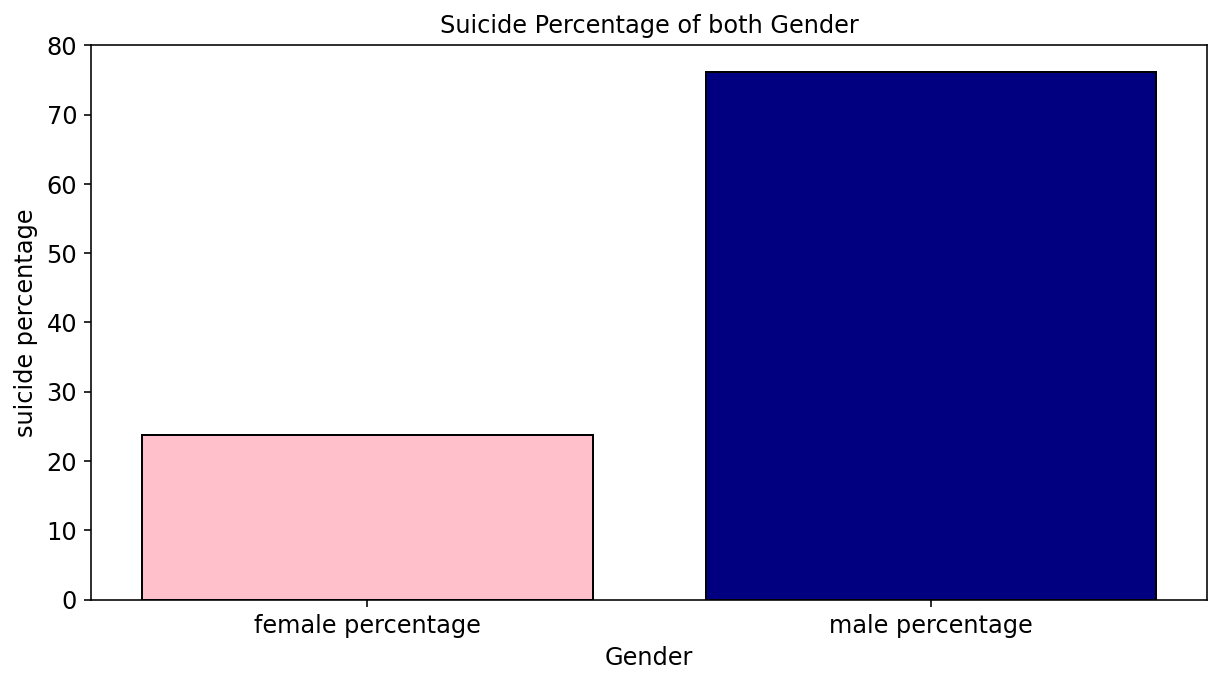

In [845]:
# calling the function to plot the bar chart
percent_suicide()

## **Heat Map:**
### **Correlation Matrix**

In [815]:
# selecting only int and float columns from the dataframe
num_cols = df.select_dtypes(include=['int64', 'float64'])

# calculating the correlation matrix
corr_matrix = num_cols.corr(method='pearson')
# printig out the results
corr_matrix


,year,suicides_no,population
year,1.00,-0.00,0.02
suicides_no,-0.00,1.00,0.61
population,0.02,0.61,1.00


In [846]:
# defining the funtion for plotting heatmap
def heatmap(corr_matrix):
    '''
    Heat Map of Correlation Matrix
    '''
    # defining the figure size ad dpi
    plt.figure(figsize=(10, 5), dpi=144)

    # creating mask for the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix))

    # plotting the heatmap by excluding the redundant values
    sns.heatmap(corr_matrix, annot=True , cmap='viridis' , mask=mask , vmax=1, vmin=-1)
    # setting the label size
    plt.tick_params(axis='both', labelsize=12)
    # title of heatmap 
    plt.title('Heatmap of correlation matrix', fontsize=12)

    plt.show()
    
    return

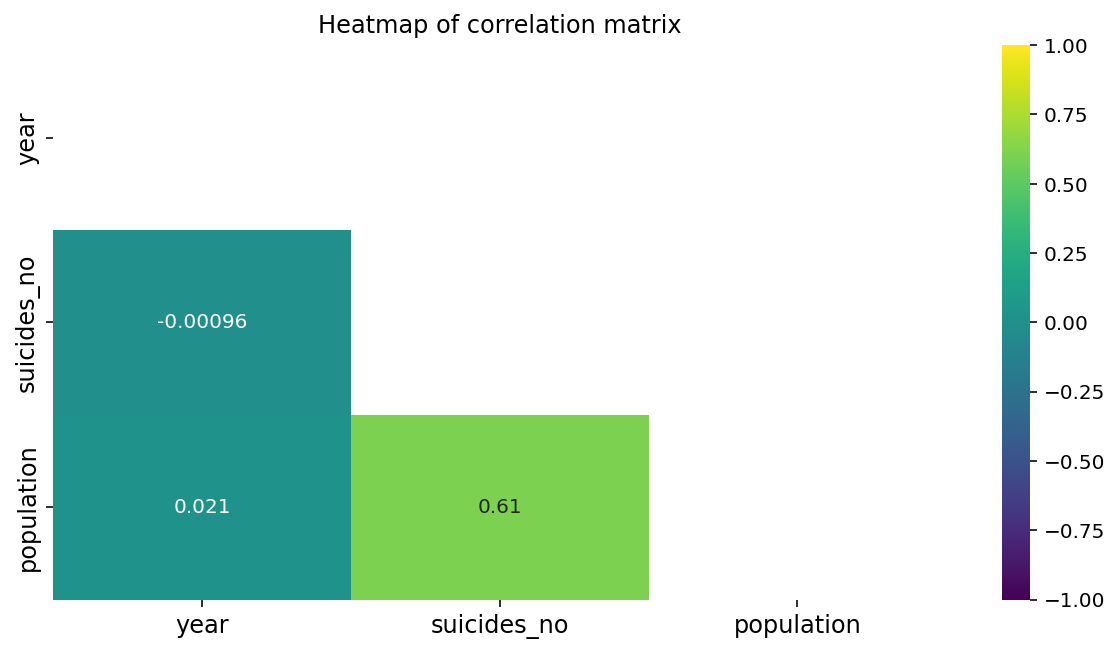

In [847]:
# calling the function to plot the heatmap
heatmap(corr_matrix)

### **Histogram:**
#### **Population Distribution**

In [818]:
'''
Mean and Median of Population
'''
# mean of population
mean_population = df['population'].mean()
print(f'mean_population = {round(mean_population, 2)}')

# median of population
median_population = df['population'].median()
print(f'median_population = {median_population}')

mean_population = 1504013.44
median_population = 380655.0


In [819]:
# creating a function to plot distribution of population
def population_histogram():
    '''
    Histogram to see the Distribution of Population column
    '''
    # defining the figure size a dpi
    plt.figure(figsize=(15, 9), dpi=144)

    # plottig the histogram using matplolib
    plt.hist(x= df['population'], bins = 50, color='green')

    # defining mean
    plt.axvline(x=mean_population, color='red', linestyle='dashed', 
                label=f'mean={mean_population.round(2)}')
    # defining median
    plt.axvline(x=median_population, color='black',
                label=f'median={median_population}')

    # defining legend
    plt.legend()

    # defining title
    plt.title('Histogram of Population')
    # defining x label
    plt.xlabel('Population')
    # defining y label
    plt.ylabel('Count')

    # to display actual values on x axis
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()
    
    return

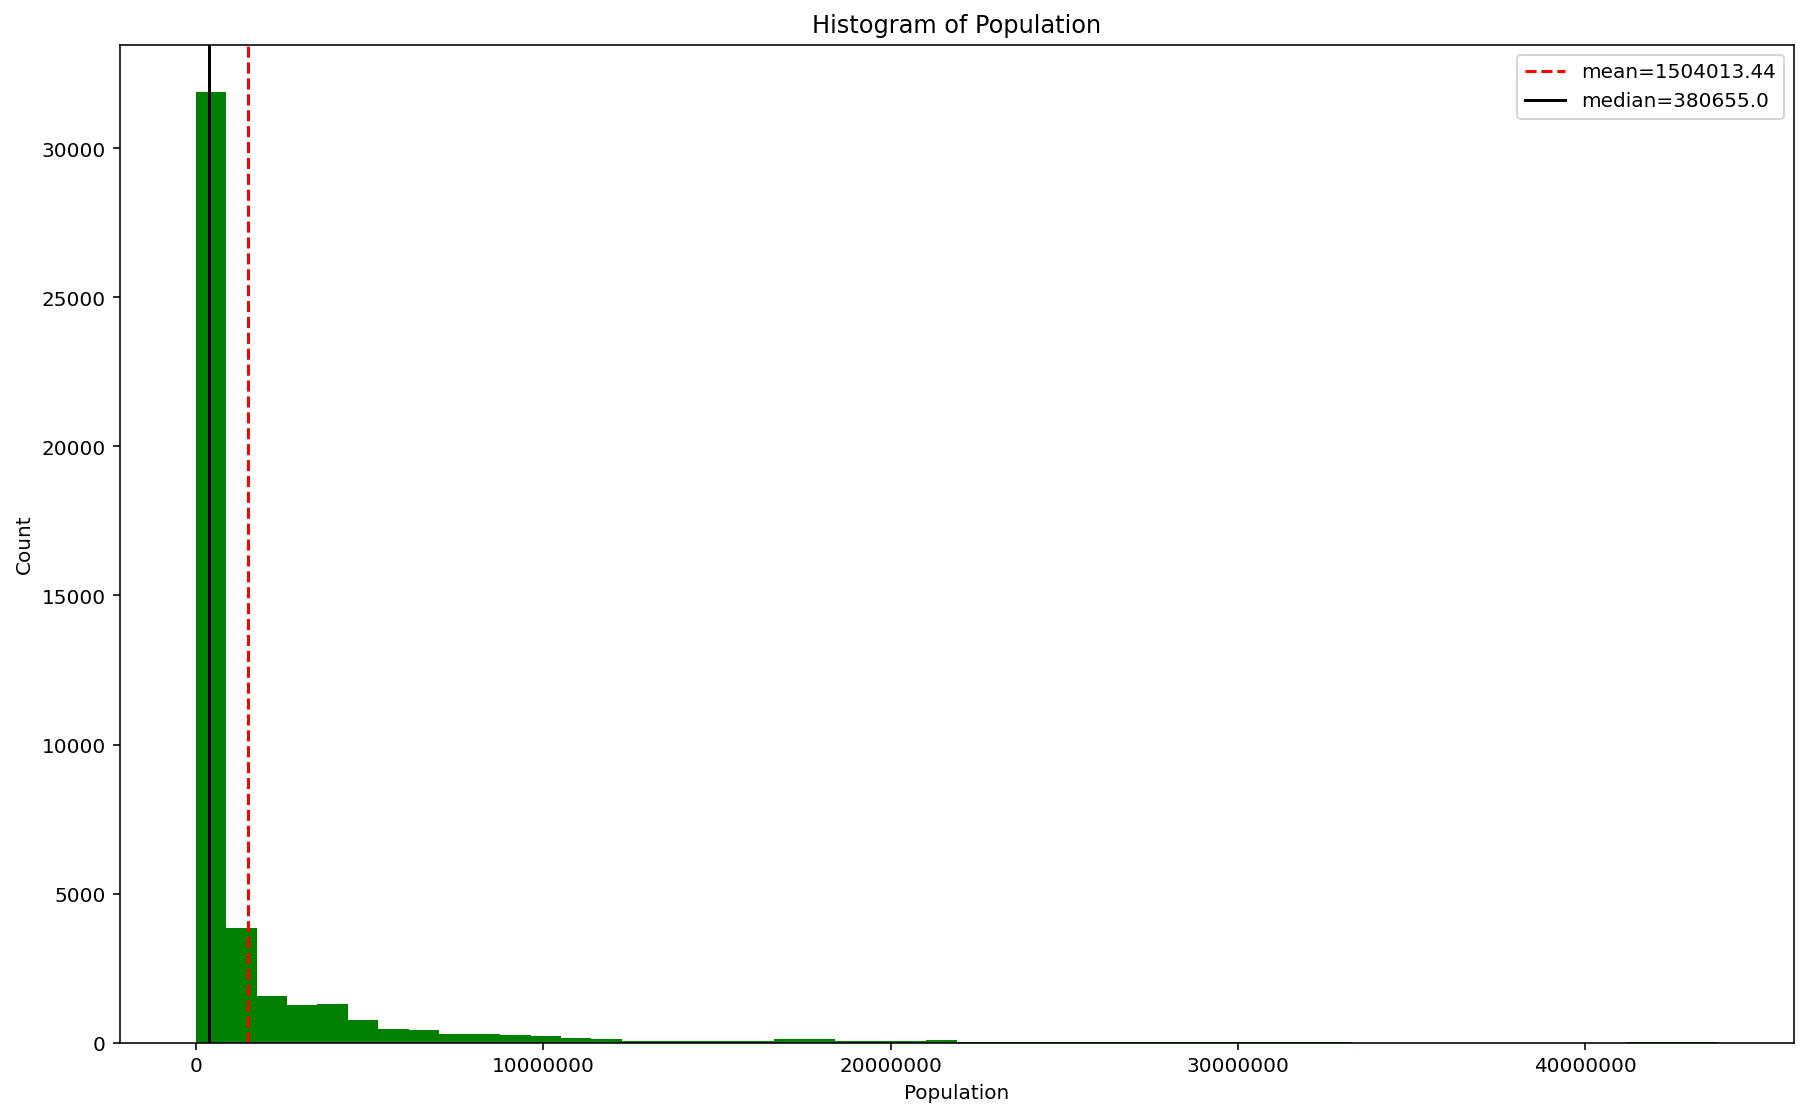

In [820]:
# calling the function to plot the histogram of population
population_histogram()

### **Plotting the Histogram of Population filtered by less than 1000000**

In [821]:
# creating a function to plot distribution of population
def histogram():
    '''
    Histogram of population filtered less than 1000000
    '''
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)

    # plottig the histogram using matplolib
    plt.hist(x= df[df['population']<1000000]['population'], bins = 100)
    
    # defining title
    plt.title('Histogram of Population filtered by population < 1000000')

    # defining x label
    plt.xlabel('Population')
    # defining y label
    plt.ylabel('Count')

    # to display actual values on x axis
    plt.ticklabel_format(style='plain', axis='x')   
    plt.show()
    
    return

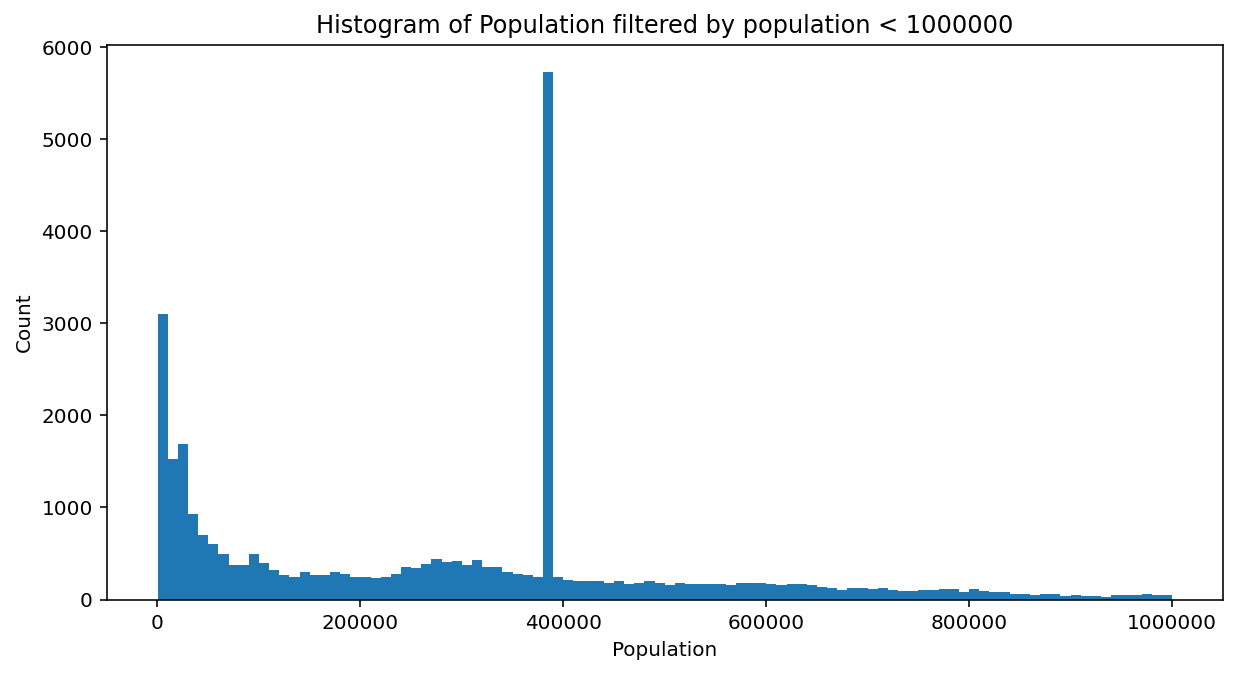

In [822]:
# calling the function to plot the histogram
histogram()

## **Histogram:**
### **Suicide Distribution**

In [823]:
'''
mean and median of suicides_no
'''
# suicides_no mean
mean_suicides=df['suicides_no'].mean()
print(f'The mean of suicides is: {round(mean_suicides, 2)} \n')

# median of suicides_no
median_suicides=df['suicides_no'].median()
print(f'The median of suicides is: {median_suicides}')

The mean of suicides is: 184.07 

The median of suicides is: 14.0


In [850]:
# creating a function to plot distribution of population
def suicide_histogram():
    '''
    Histogram of suicides_no
    ''' 
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)
    # plottig the histogram using matplolib
    plt.hist(x= df['suicides_no'], bins = 50, color='green')

    # defining mean
    plt.axvline(x=mean_suicides, color='red', linestyle='dashed', linewidth=1.5,
                label=f'mean={mean_suicides.round(2)}')
    # defining median
    plt.axvline(x=median_suicides, color='black', linewidth=1.5,
                label=f'median={median_suicides}')

    # defining title
    plt.title('Histogram of suicides_no', fontsize=16)
    # printing legend
    plt.legend(fontsize=14)

    # defining x label
    plt.xlabel('suicides_no' , fontsize=14)
    # defining y label
    plt.ylabel('Count', fontsize=14)
    
    # setting the label size
    plt.tick_params(axis='both', labelsize=12)
    # to display actual values on x axis
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.show()
    
    return

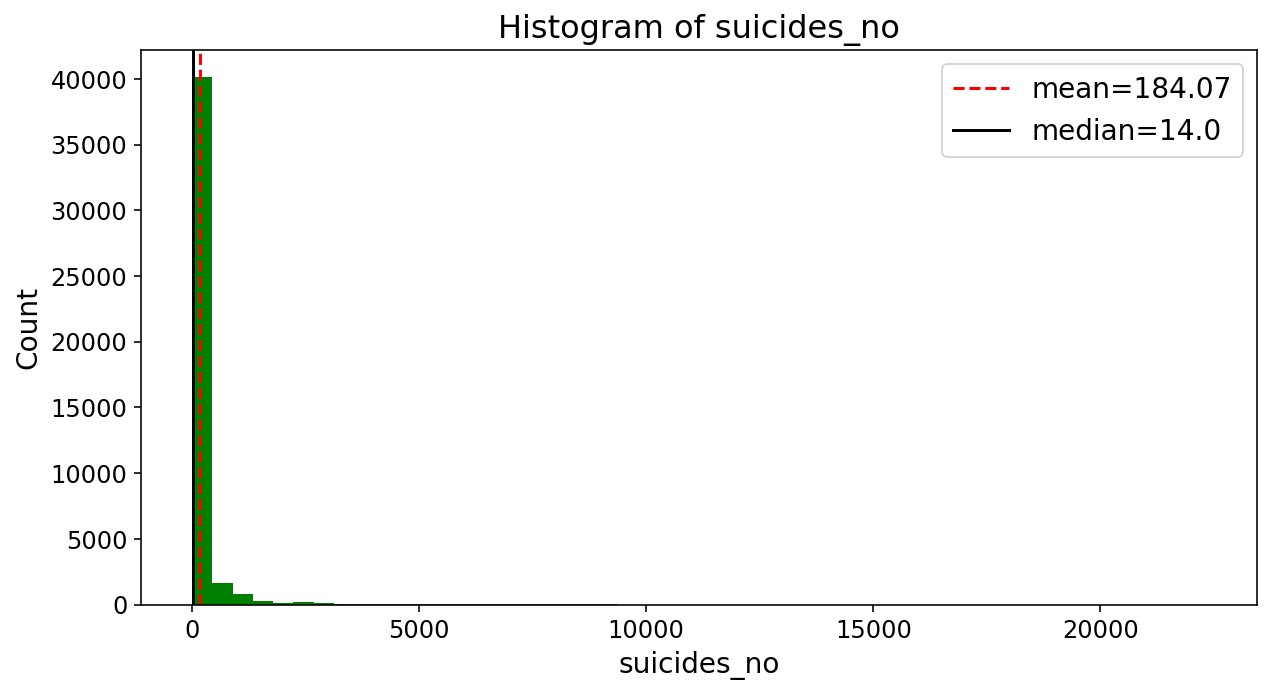

In [851]:
# calling the function to plot the histogram
suicide_histogram()

### **Histogram of Suicides (filtered less than mean of it)**

In [854]:
# creating a function to plot distribution of population
def suicides_no_histogram_less_than_mean():
    '''
    Histogram of suicides_no
    ''' 
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)
    # plottig the histogram using matplolib
    plt.hist(df[df['suicides_no']<=df['suicides_no'].mean()]['suicides_no'], bins = 50)

    plt.axvline(df['suicides_no'].median(), linestyle='dotted', linewidth=3,
                label=f'median: {df.suicides_no.median()}', color='red')

    # defining title
    plt.title('Histogram of suicides_no (filtered less than the median of Suicides)', fontsize=14)
    # printing legend
    plt.legend(fontsize=14)

    # defining x label
    plt.xlabel('suicides_no', fontsize=12)
    # defining y label
    plt.ylabel('Count', fontsize=12)

    # setting the label size
    plt.tick_params(axis='both', labelsize=12)

    # to display actual values on x axis
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.show()
    
    return

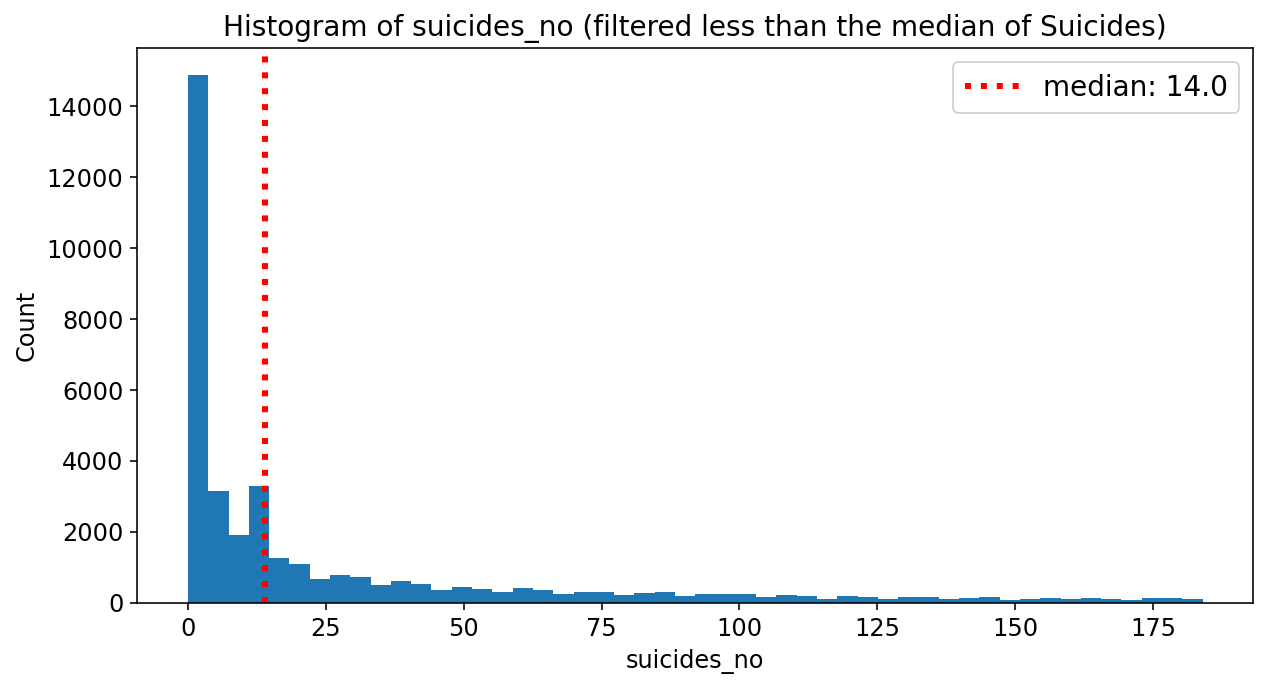

In [855]:
# calling the function to plot the histogram
suicides_no_histogram_less_than_mean()

## **Box Plot:**
### **Gender v/s Suicides**

In [740]:
# creating a function to plot box chart of Gender vs. Suicides
def box_plot_sex_vs_suicides():
    '''
    box plot of gender vs suicides
    '''
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)

    # plottig the histogram using matplolib
    sns.boxplot(x = df['sex'], y= df['suicides_no'])

    # defining title
    plt.title('Box plot of sex v/s suicides_no')
    # defining x label
    plt.xlabel('sex')
    # defining y label
    plt.ylabel('suicides_no')

    plt.show()
    
    return

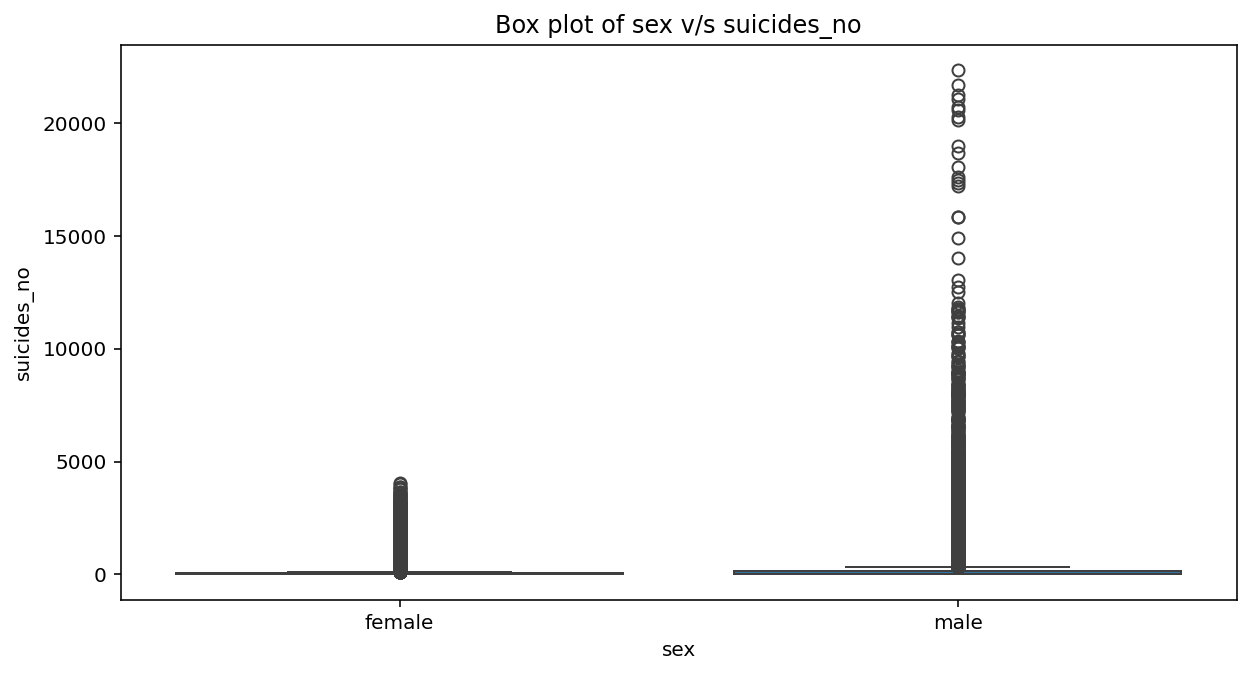

In [741]:
box_plot_sex_vs_suicides()

---

we are unable to get any clear information from the box plot of `sex v/s suicides_no` as `suicides_no` column is not normally distributed. As suicides_no have some very extreme vaules which causes the skewness.

**Note:** In order to avoid this issue we can use log transformation.

---

### **Box Plot:**
#### **Gender v/s Log_transformed Suicides**

In [870]:
# creating a function to plot box chart of Gender vs.Log transformed Suicides
def box_plot_sex_vs_suicides_normalized():
    '''
    Box plot of sex vs log-normalized suicides_no
    '''
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)

    # plottig the box plot using seaborn
    sns.boxplot(x=df['sex'], y= np.log(df['suicides_no']+1), hue=df['sex'])
    
    # defining title
    plt.title('Box plot of sex v/s Log_transformed suicides_no', fontsize=14)

    # defining x label
    plt.xlabel('sex', fontsize=12)
    # defining y label
    plt.ylabel("log(suicides_no's)" , fontsize=12)
    
    plt.show()
    
    return

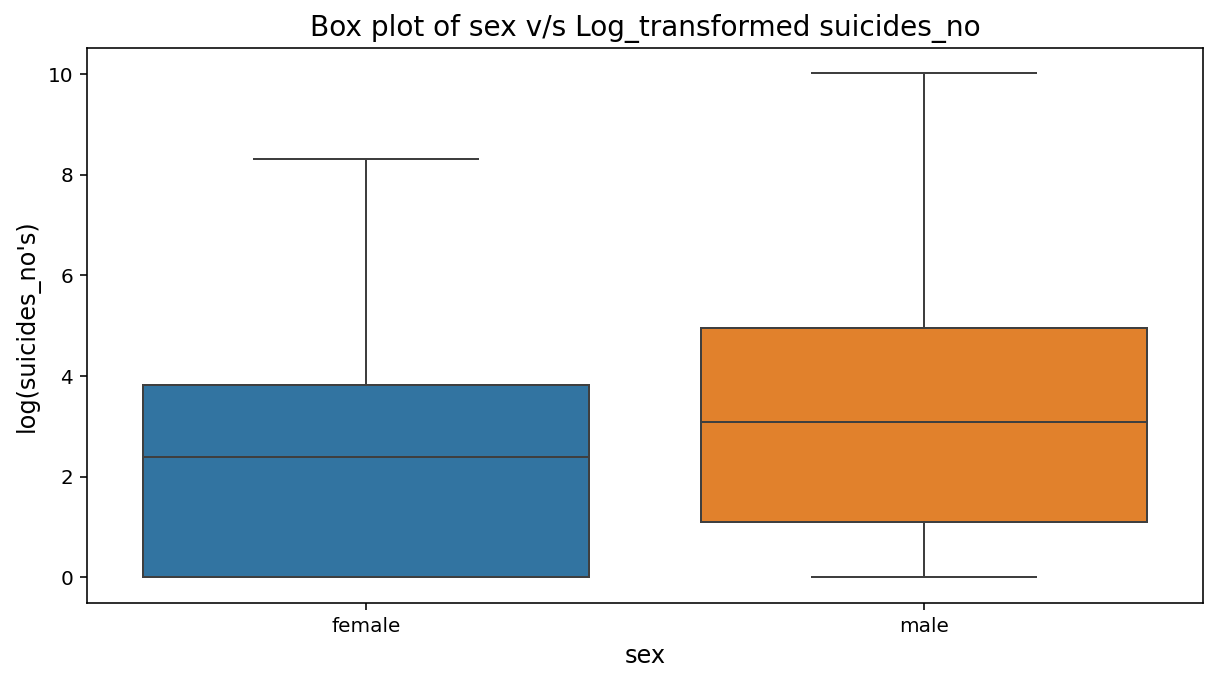

In [872]:
# calling the function to plot the box plot
box_plot_sex_vs_suicides_normalized()

## **Violin Plot:**
### **Gender v/s Population**

In [744]:
# creating a function to make a voilin plot of gender vs. population
def voilin_plot_gender_vs_population():
    '''
    voilin plot gender vs population
    '''
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)

    # plottig the voilin plot using seaborn
    sns.boxplot(x=df['sex'],  y=df['population'])
    
    # defining title
    plt.title('voilin plot of sex v/s population')

    # defining x label
    plt.xlabel('sex')
    # defining y label
    plt.ylabel('population')
    
    # to display actual values on x axis
    plt.ticklabel_format(style='plain', axis='y')

    plt.show()
    
    return

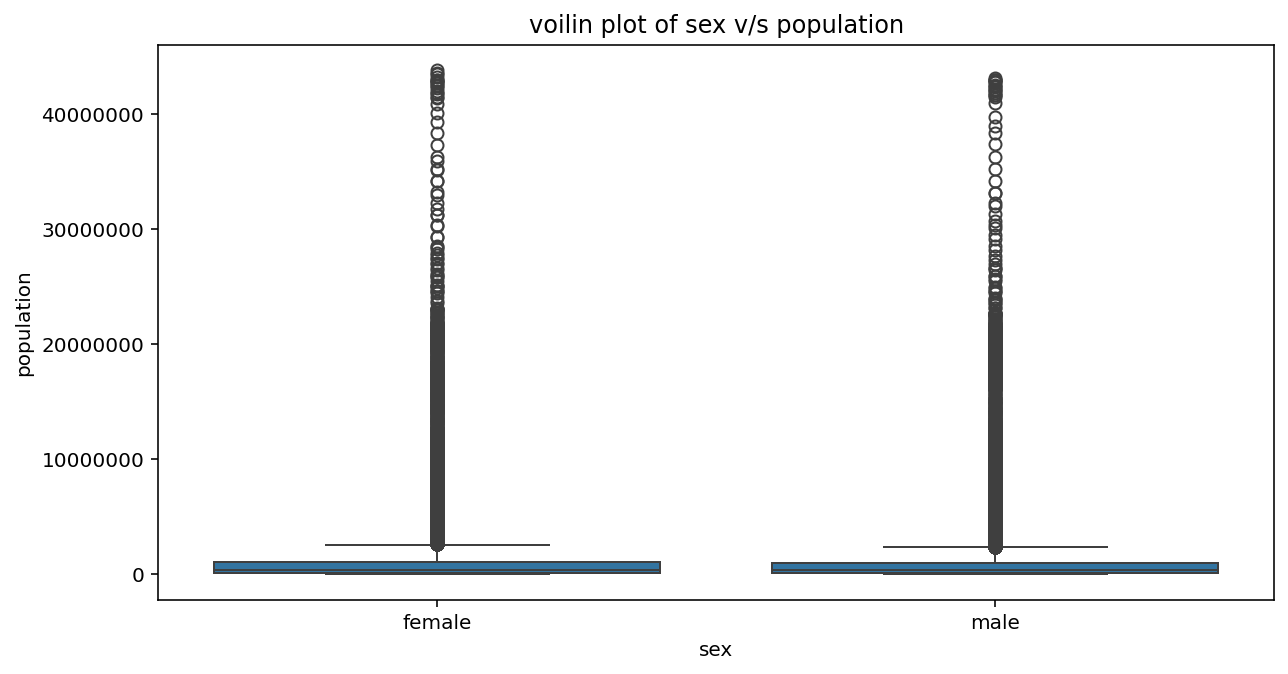

In [745]:
voilin_plot_gender_vs_population()

---

we are unable to get any clear information from the voilin plot of sex v/s population as population column is not normally distributed which is clear from the histogram. As the values have some very extreme vaules which causes the skewness of the median.

**Note:** In order to avoid this issue we can use log transformation.

---


## **Violin Plot:**
### **Gender v/s Log_transformed Population**

In [746]:
# creating a function to make a voilin plot of sex vs log transformed population 
def voilin_plot_sex_vs_population_normalized():
    '''
    voilin plot of sex vs log normalized population
    '''
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)

    # plottig the voilin plot using seaborn
    sns.violinplot(x=df['sex'], y=np.log(df['population']), color='darkblue')
    
    # defining title
    plt.title('voilin plot of sex v/s population normalized')

    # defining x label
    plt.xlabel('sex')
    # defining y label
    plt.ylabel('log(population)')
    plt.show()
    
    return

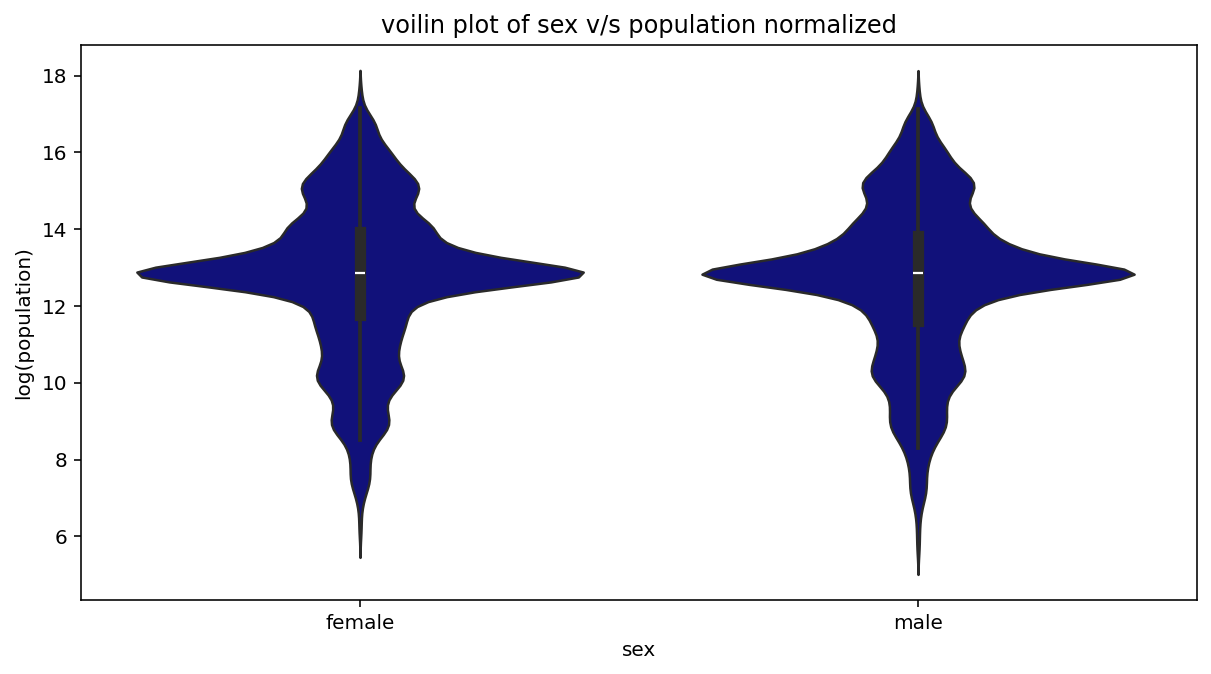

In [747]:
# calling the function to plot the box plot
voilin_plot_sex_vs_population_normalized()

## **Line Plot:**
### **Year v/s Suicides**

In [858]:
# creating a function to plot line chart of year vs. Suicides
def line_plot_suicides_vs_year():
    '''
    Suicidal trends year wise
    '''
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)

    # plottig the line plot using seaborn 
    sns.lineplot(x=df['year'], y=df['suicides_no'], hue=df['sex'])
    
    # defining title
    plt.title('line plot of year v/s suicides_no', fontsize=14)
    # grid
    plt.grid()
    plt.legend(fontsize=12)
    # defining x label
    plt.xlabel('year', fontsize=12)
    # defining y label
    plt.ylabel('suicides_no', fontsize=12)
    plt.show()
    
    return

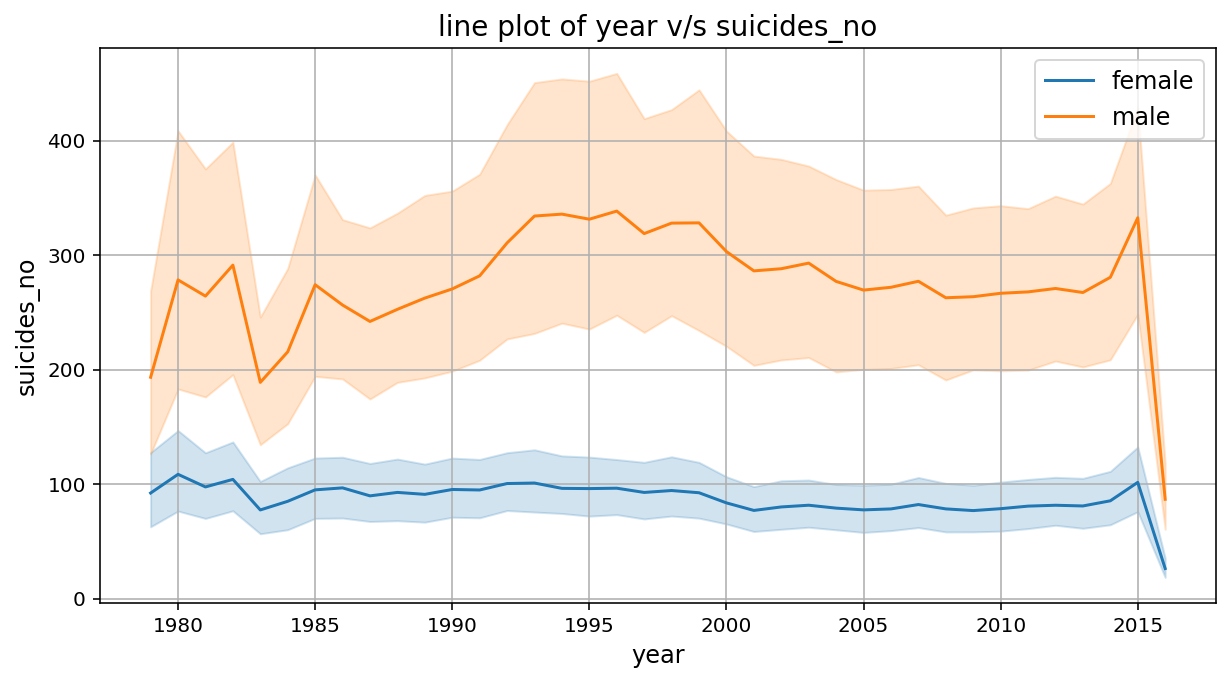

In [859]:
# calling the function to plot the line plot
line_plot_suicides_vs_year()

---

From the above graph it is clear that male suicide numbers have more fluctuations than the female over the perid of time. As compared to this the female suicide number have remain almost stable for one decade from 1990 to 1995. Surprisingly both male and female experienced an sudden decrease in suicides after 2015.

---

## **Line Plot:**
### **Year v/s suicides in Relation with Age column**

In [864]:
# creating a function to plot line chart of year vs. suicides number
def line_plot_year_vs_suicides_relative_to_age():
    '''
    Yealry Suicidal trends relative to Age groups
    '''
    # defining the figure size a dpi
    plt.figure(figsize=(10, 5), dpi=144)

    # plottig the line plot using seaborn
    sns.lineplot(x=df['year'], y=df['suicides_no'], hue=df['age'])
    
    # defining title
    plt.title('line plot of year v/s suicides_no relative to age', fontsize=14)

    # to display actual values on y axis
    plt.ticklabel_format(style='plain', axis='y')

    # grid
    plt.grid()
    # defining x label
    plt.xlabel('year', fontsize=12)
    # defining y label
    plt.ylabel('suicides_no', fontsize=12)
    plt.show()
    
    return

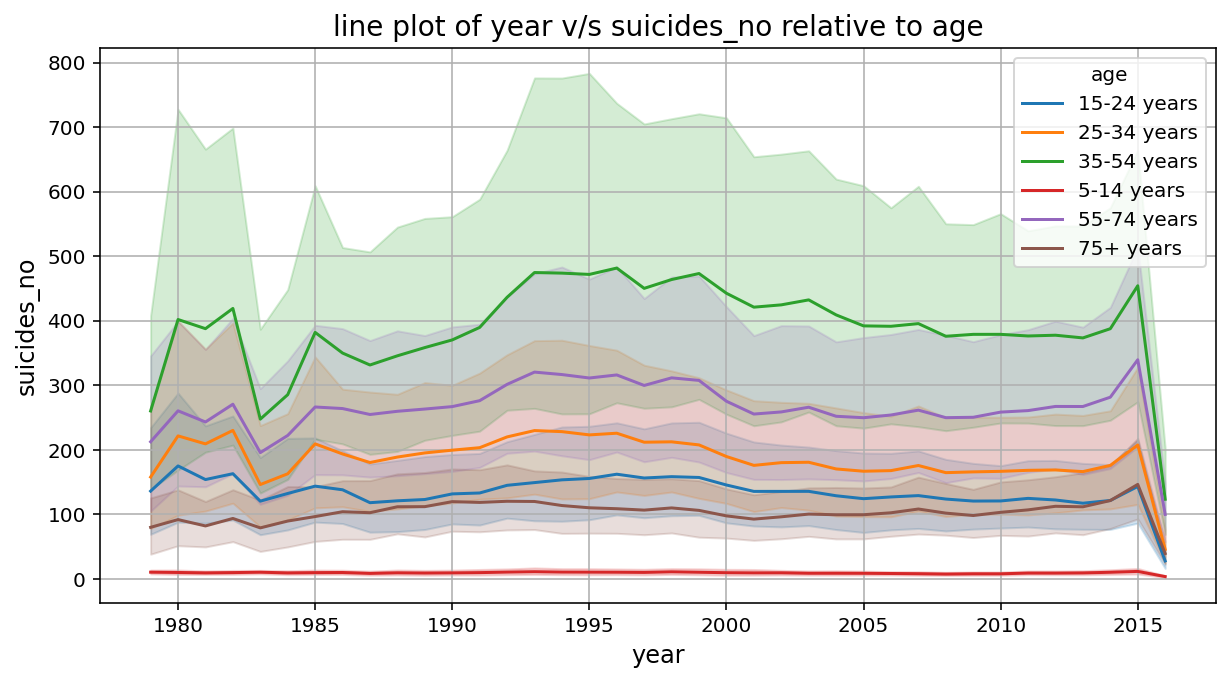

In [865]:
# calling the function to plot the line plot
line_plot_year_vs_suicides_relative_to_age()

---

From the above line graph of suicides number vs year in relation with age we are clear that in the age group 5-14 the number of suicides are almost stable nearly equals to zero.Similarly in older age like 75+ the number of suicides are almost stable. Whereas, the mid age group of 35-54 has the highest number of suicides.

---